<a href="https://colab.research.google.com/github/tylershienlim/31005-ml-as2/blob/main/Assignment_2_13657919_Lim_Shi_En.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Tyler Lim Shi En

# Student Id: 13657919

# ML Algorithm: ID3 Decision Tree

# This is my assignment 2 project python code for the algorithm implementation

# Step 1: Importing of dependancies

In [ ]:
#import dependencies
import numpy as np
import pandas as pd
import random
from pprint import pprint

from operator import itemgetter
import math

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# Step 2: Data Exploration and Preparation (Preprocessing)

##Data set to be used for training model

##Sklearn Wine Data Set


---



###Attribute Information:
1.   Alcohol
2.   Malic Acid
3.   Ash
4.   Alcalinity of ash
5.   Magnesium
6.   Total Phenols
7.   Flavanoids
8.   Nonflavanoid phenols
9.   Proanthocyanins
10.   Color Intensity
11.   Hue
12.   OD280/OD315 of diluted wines
13.   Proline

###Target Information:
1.   Class of wine

In [ ]:
#loading the wine data set
wine = load_wine()
scikit_wine = load_wine()
scikit_wine_X, scikit_wine_y = scikit_wine.data, scikit_wine.target

#splitting the data set into X and y using pandas
Xdf = pd.DataFrame(wine.data, columns=wine.feature_names)
ydf = pd.DataFrame(wine.target)

#combine into single dataframe
df = Xdf.join(ydf)
df = df.rename(columns={0: "Wine"})

In [ ]:
#show wine predictions
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
#Column names in the dataframe
list(df)

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline',
 'Wine']

In [ ]:
#Column names in the dataframe
#check for any null values etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Wine 

In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
X, y = wine['data'], wine['target']

#shape of features attribute
print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [ ]:
#Correlation Matrix
#round to 3 decimal places
cormatrix = df.corr()
round(cormatrix, 3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine
alcohol,1.000,0.094,0.212,-0.310,0.271,0.289,0.237,-0.156,0.137,0.546,-0.072,0.072,0.644,-0.328
malic_acid,0.094,1.000,0.164,0.289,-0.055,-0.335,-0.411,0.293,-0.221,0.249,-0.561,-0.369,-0.192,0.438
ash,0.212,0.164,1.000,0.443,0.287,0.129,0.115,0.186,0.010,0.259,-0.075,0.004,0.224,-0.050
alcalinity_of_ash,-0.310,0.289,0.443,1.000,-0.083,-0.321,-0.351,0.362,-0.197,0.019,-0.274,-0.277,-0.441,0.518
magnesium,0.271,-0.055,0.287,-0.083,1.000,0.214,0.196,-0.256,0.236,0.200,0.055,0.066,0.393,-0.209
total_phenols,0.289,-0.335,0.129,-0.321,0.214,1.000,0.865,-0.450,0.612,-0.055,0.434,0.700,0.498,-0.719
flavanoids,0.237,-0.411,0.115,-0.351,0.196,0.865,1.000,-0.538,0.653,-0.172,0.543,0.787,0.494,-0.847
nonflavanoid_phenols,-0.156,0.293,0.186,0.362,-0.256,-0.450,-0.538,1.000,-0.366,0.139,-0.263,-0.503,-0.311,0.489
proanthocyanins,0.137,-0.221,0.010,-0.197,0.236,0.612,0.653,-0.366,1.000,-0.025,0.296,0.519,0.330,-0.499
color_intensity,0.546,0.249,0.259,0.019,0.200,-0.055,-0.172,0.139,-0.025,1.000,-0.522,-0.429,0.316,0.266


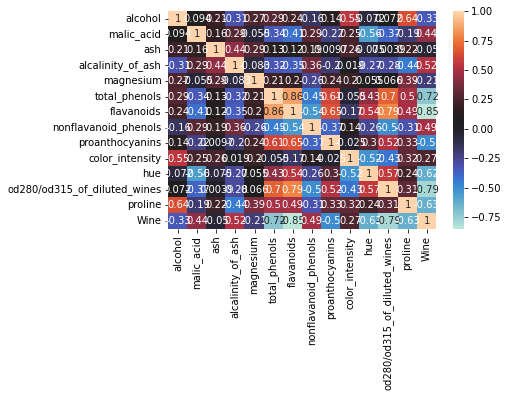

In [ ]:
#heatmap correlation of data
sns.heatmap(cormatrix, annot=True, cmap='icefire')

In [ ]:
#showing correlation in regards to Wine only
cormatrix['Wine']

alcohol                        -0.328222
malic_acid                      0.437776
ash                            -0.049643
alcalinity_of_ash               0.517859
magnesium                      -0.209179
total_phenols                  -0.719163
flavanoids                     -0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                -0.499130
color_intensity                 0.265668
hue                            -0.617369
od280/od315_of_diluted_wines   -0.788230
proline                        -0.633717
Wine                            1.000000
Name: Wine, dtype: float64

In [ ]:
#plotting scatter matrix for those that have a positive correlation to Wine
wine_scatter_matrix = px.scatter_matrix(df,
                                        dimensions=['malic_acid', 'alcalinity_of_ash',
                                                    'nonflavanoid_phenols',
                                                    'color_intensity',],
                                        color="Wine")
wine_scatter_matrix.show()

##Loading another data set and conducing EDA to be used for model evaluation

##Sklearn Iris Data Set

---


###Attribute Information:
1.   sepal length (cm)
2.   sepal width (cm)
3.   petal length (cm)
4.   petal width (cm)

###Target Information:
1.   Class of flower


In [ ]:
#loading the iris data set
iris = load_iris()
scikit_iris = load_iris()
scikit_iris_X, scikit_iris_y = scikit_iris.data, scikit_iris.target

#splitting the data set into X and y using pandas
iris_Xdf = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_ydf = pd.DataFrame(iris.target)

#combine into single dataframe
iris_df = iris_Xdf.join(iris_ydf)

#renaming columns without the need for units
iris_df = iris_df.rename(columns={'sepal length (cm)':'sepal_length',
                                  'sepal width (cm)':'sepal_width',
                                  'petal length (cm)':'petal_length',
                                  'petal width (cm)':'petal_width',
                                  0:'Species'})

In [ ]:
#Column names in the dataframe
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#Check for missing values
#Check for data type
#Check number of attributes/features
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
X, y = iris['data'], iris['target']

#shape of features attribute - 150 rows of 4 columns
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
#Correlation Matrix
#round to 3 decimal places
irismatrix = iris_df.corr()
round(irismatrix, 3)

,sepal_length,sepal_width,petal_length,petal_width,Species
sepal_length,1.000,-0.118,0.872,0.818,0.783
sepal_width,-0.118,1.000,-0.428,-0.366,-0.427
petal_length,0.872,-0.428,1.000,0.963,0.949
petal_width,0.818,-0.366,0.963,1.000,0.957
Species,0.783,-0.427,0.949,0.957,1.000


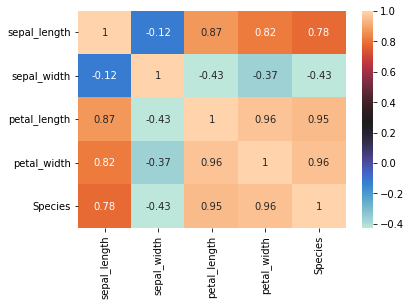

In [ ]:
#heatmap correlation of data
sns.heatmap(irismatrix, annot=True, cmap='icefire')

In [ ]:
#correlation of features with respect to species
irismatrix['Species']

sepal_length    0.782561
sepal_width    -0.426658
petal_length    0.949035
petal_width     0.956547
Species         1.000000
Name: Species, dtype: float64

In [ ]:
#scatter matrix to better show correlation of features
iris_scatter_matrix = px.scatter_matrix(iris_df,
                                        dimensions=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                                        color="Species")
iris_scatter_matrix.show()

# Step 3: Creating ID3 Decision Tree Model

### Using Scikit Learn Train Test Split Fucntion

In [ ]:
#splitting data set into training and testing sizes
scikit_wine_X_train, scikit_wine_X_test, scikit_wine_y_train, scikit_wine_y_test = train_test_split(scikit_wine_X, scikit_wine_y, test_size=0.33, random_state=42)

#splitting data set into training and testing sizes
scikit_iris_X_train, scikit_iris_X_test, scikit_iris_y_train, scikit_iris_y_test = train_test_split(scikit_iris_X, scikit_iris_y, test_size=0.33, random_state=42)

##Information Gain Computation

In [ ]:
#informatin gain computation
def compute_info_gain(x, y):
        #initialize minimum values or none values
        #allows to be reset once values are found from iteration
        col = None
        min_entropy = 1
        cutoff = None
        #iterate through each values on a column
        #find a threshold from the values to determine minimum entropy
        for i, j in enumerate(x.T):
            entropy, cur_cutoff = compute_ig_single(j, y)
            #if entropy is perfect scenario (0), stop iterating
            if entropy == 0:
                return i, cur_cutoff, entropy
            #continue to iterate and find the minimum entropy
            elif entropy <= min_entropy:
                min_entropy = entropy
                col = i
                cutoff = cur_cutoff
        #return important values
        #column that gives best information gain
        #cutoff refers to threshold that creates a node
        #minimum entropy value
        return col, cutoff, min_entropy

#find best questiont to ask per split
#col -> column that is going to create a new node
#y -> target variable
def compute_ig_single(col, y):
    min_entropy = 10
    n = len(y)
    for value in set(col):
        y_predict = col < value
        my_entropy = get_entropy(y_predict, y)
        #take the lowest entropy
        if my_entropy <= min_entropy:
            min_entropy = my_entropy
            cutoff = value
    return min_entropy, cutoff

##Entropy Computation

In [ ]:
#entropy formula
def entropy_func(c, n):
    return -(c*1.0/n)*math.log(c*1.0/n, 2)

def entropy_cal(c1, c2):
    """
    Returns entropy of a group of data
    c1: count of one target variable
    c2: count of second target variable
    """
    # when there is only one target variable in the group
    # entropy is 0
    if c1== 0 or c2 == 0:
        return 0
    return entropy_func(c1, c1+c2) + entropy_func(c2, c1+c2)

# get the entropy of one group showing above
def entropy_of_group(division):
    """
    Returns entropy of a divided group of data
    Data may have multiple classes
    """
    s = 0
    n = len(division)
    classes = set(division)
    # for each class, get entropy
    for c in classes:
        n_c = sum(division==c)
        # weighted avg
        e = n_c*1.0/n * entropy_cal(sum(division==c), sum(division!=c))
        s += e
    return s, n

# The whole entropy of both groups combined
def get_entropy(y_predict, y_real):
    """
    Returns entropy of a split
    y_predict is the split decision, True/Fasle, and y_true can be multi class
    """
    if len(y_predict) != len(y_real):
        print('They have to be the same length')
        return None
    n = len(y_real)
    # left hand side entropy
    s_true, n_true = entropy_of_group(y_real[y_predict])
     # right hand side entropy
    s_false, n_false = entropy_of_group(y_real[~y_predict])
    # overall entropy, again weighted average
    s = n_true*1.0/n * s_true + n_false*1.0/n * s_false
    return s

##ID3 Model

In [ ]:
class ID3Tree(object):
    def __init__(self, max_depth, feature_names):
        #starting depth
        self.depth = 0

        #max tree depth wanted/allowed
        self.max_depth = max_depth

        #feature name
        self.feature_names = feature_names

    #tree fitting function
    #used to train the model
    #uses recursion
    def fit(self, x, y, nodes={}, depth=0):
        #tree to stop at previous level
        if nodes is None:
            return None
        #if there is nothing else to classify
        #no data in group
        elif len(y) == 0:
            return None
        #if all target values are the same
        #can classify completely
        elif self.all_same(y):
            return {'prediction':y[0]}
        #max depth allowed for tree depth reached
        elif depth >= self.max_depth:
            return None
        #leaf/decision node generation
        else:
            #find best split -> compute information gain based on splits
            col, cutoff, entropy = compute_info_gain(x, y)
            y_left = y[x[:, col] < cutoff]
            y_right = y[x[:, col] >= cutoff]

            #setting the leaf nodes
            nodes = {'col': self.feature_names[col], 'index_col':col,
                        'cutoff':cutoff,
                       'prediction': np.round(np.mean(y))}
            nodes['left'] = self.fit(x[x[:, col] < cutoff], y_left, {}, depth+1)
            nodes['right'] = self.fit(x[x[:, col] >= cutoff], y_right, {}, depth+1)

            #increasing tree depth
            self.depth += 1
            self.trees = nodes
            return nodes


    def all_same(self, items):
        return all(x == items[0] for x in items)

    #prediction function for ID3 model
    def predict(self, x):
        tree = self.trees
        results = np.array([0]*len(x))
        for i, c in enumerate(x):
            results[i] = self._get_prediction(c)
        return results

    def _get_prediction(self, row):
        cur_layer = self.trees
        while cur_layer.get('cutoff'):
            if row[cur_layer['index_col']] < cur_layer['cutoff']:
                cur_layer = cur_layer['left']
            else:
                cur_layer = cur_layer['right']
        else:
            return cur_layer.get('prediction')

In [ ]:
def compute_accuracy(y_true, y_pred):
          correct_predictions = 0
          # iterate over each label and check
          for true, predicted in zip(y_true, y_pred):
              if true == predicted:
                  correct_predictions += 1
          # compute the accuracy
          accuracy = correct_predictions/len(y_true)
          return accuracy

#Step 4: Implementation and Evaluation against Scikit Learn Decision Tree

##Wine Data Set

###Implementation of ID3 Self Created Tree

In [ ]:
#create decision tree model
wineclf = ID3Tree(max_depth=6, feature_names=wine.feature_names)

#fit it with training data
wine_model = wineclf.fit(scikit_wine_X_train, scikit_wine_y_train)

#prints decision tree using pprint python module
pprint(wine_model)

{'col': 'color_intensity',
 'cutoff': 3.58,
 'index_col': 9,
 'left': {'prediction': 1},
 'prediction': 1.0,
 'right': {'col': 'flavanoids',
           'cutoff': 1.41,
           'index_col': 6,
           'left': {'col': 'alcohol',
                    'cutoff': 12.2,
                    'index_col': 0,
                    'left': {'prediction': 1},
                    'prediction': 2.0,
                    'right': {'prediction': 2}},
           'prediction': 1.0,
           'right': {'col': 'proline',
                     'cutoff': 735.0,
                     'index_col': 12,
                     'left': {'col': 'malic_acid',
                              'cutoff': 3.98,
                              'index_col': 1,
                              'left': {'prediction': 1},
                              'prediction': 1.0,
                              'right': {'prediction': 0}},
                     'prediction': 0.0,
                     'right': {'prediction': 0}}}}


###Scikit Decision Tree for Wine Data

In [ ]:
#loading data set
scikit_wine = load_wine()
scikit_wine_X, scikit_wine_y = scikit_wine.data, scikit_wine.target

#splitting data set into training and testing sizes
scikit_wine_X_train, scikit_wine_X_test, scikit_wine_y_train, scikit_wine_y_test = train_test_split(scikit_wine_X, scikit_wine_y, test_size=0.33, random_state=42)

In [ ]:
#initializing the decision tree
scikit_wine_clf = tree.DecisionTreeClassifier()

#training/fitting decision tree using training data set
scikit_wine_clf = scikit_wine_clf.fit(scikit_wine_X_train, scikit_wine_y_train)

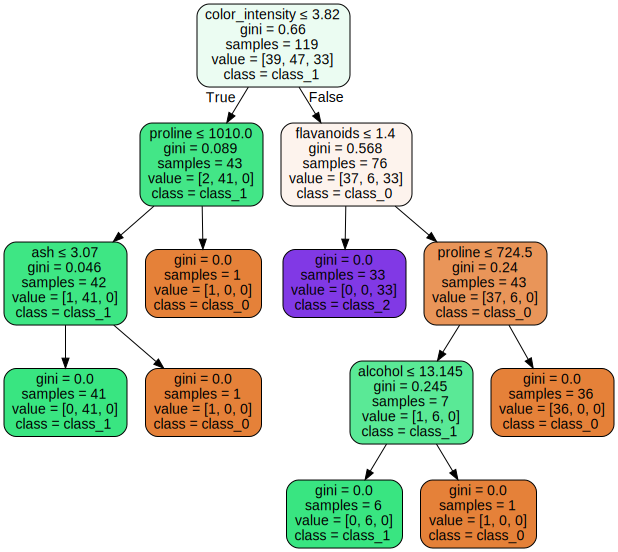

In [ ]:
#visualizing decision tree graph on a bigger clearer image
dot_data = tree.export_graphviz(scikit_wine_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Wine")
dot_data = tree.export_graphviz(scikit_wine_clf, out_file=None,
                                feature_names=scikit_wine.feature_names,
                                class_names=scikit_wine.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

###Predictions using trained model and scikit model on testing data set


In [ ]:
#predicting testing data set values using ID3 model
wine_ID3_y_pred = wineclf.predict(scikit_wine_X_test)

#predicting testing data set values using sklearn model
y_pred = scikit_wine_clf.predict(scikit_wine_X_test)

In [ ]:
#comparison between predicted and actual values for sklearn model
print(f'ID3 y prediction values: \n {wine_ID3_y_pred}\n')
print(f'scikit y_prediction values: \n{y_pred}\n')
print(f'y_actual values: \n{scikit_wine_y_test}\n')

ID3 y prediction values: 
 [0 0 2 0 1 0 1 2 1 2 1 1 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2 2 1 1 0 1]

scikit y_prediction values: 
[0 0 2 0 1 0 1 2 1 2 1 0 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2 2 1 1 0 1]

y_actual values: 
[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2 2 1 1 0 1]



In [ ]:
#accuracy of ID3 decision tree model
print(f'ID3 model accuracy:\n{compute_accuracy(scikit_wine_y_test, wine_ID3_y_pred)}\n')

#accuracy of sklearn decision tree model
print(f'scikit model accuracy:\n{accuracy_score(scikit_wine_y_test, y_pred)}\n')

ID3 model accuracy:
0.9661016949152542

scikit model accuracy:
0.9661016949152542



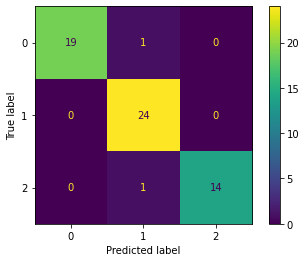

In [ ]:
#ID3 Model
#confusion matrix of true vs prediction values
ConfusionMatrixDisplay.from_predictions(scikit_wine_y_test, wine_ID3_y_pred)

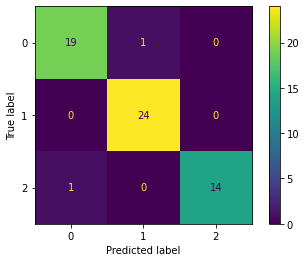

In [ ]:
#Scikit Model
#confusion matrix of true vs prediction values
ConfusionMatrixDisplay.from_predictions(scikit_wine_y_test, y_pred)

##Iris Data

###Implementation of ID3 Self Created Tree

In [ ]:
#create decision tree model
iris_clf = ID3Tree(max_depth=7, feature_names=iris.feature_names)

#fit it with training data
iris_model = iris_clf.fit(scikit_iris_X_train, scikit_iris_y_train)

#prints decision tree using pprint python module
pprint(iris_model)

{'col': 'petal width (cm)',
 'cutoff': 1.0,
 'index_col': 3,
 'left': {'prediction': 0},
 'prediction': 1.0,
 'right': {'col': 'petal width (cm)',
           'cutoff': 1.8,
           'index_col': 3,
           'left': {'col': 'petal length (cm)',
                    'cutoff': 5.6,
                    'index_col': 2,
                    'left': {'col': 'petal width (cm)',
                             'cutoff': 1.5,
                             'index_col': 3,
                             'left': {'prediction': 1},
                             'prediction': 1.0,
                             'right': {'col': 'sepal width (cm)',
                                       'cutoff': 2.7,
                                       'index_col': 1,
                                       'left': {'col': 'sepal length (cm)',
                                                'cutoff': 6.3,
                                                'index_col': 0,
                                                'left'

###Scikit Learn Decision Tree for Iris Data

In [ ]:
scikit_iris_clf = tree.DecisionTreeClassifier()
scikit_iris_clf = scikit_iris_clf.fit(scikit_iris_X, scikit_iris_y)

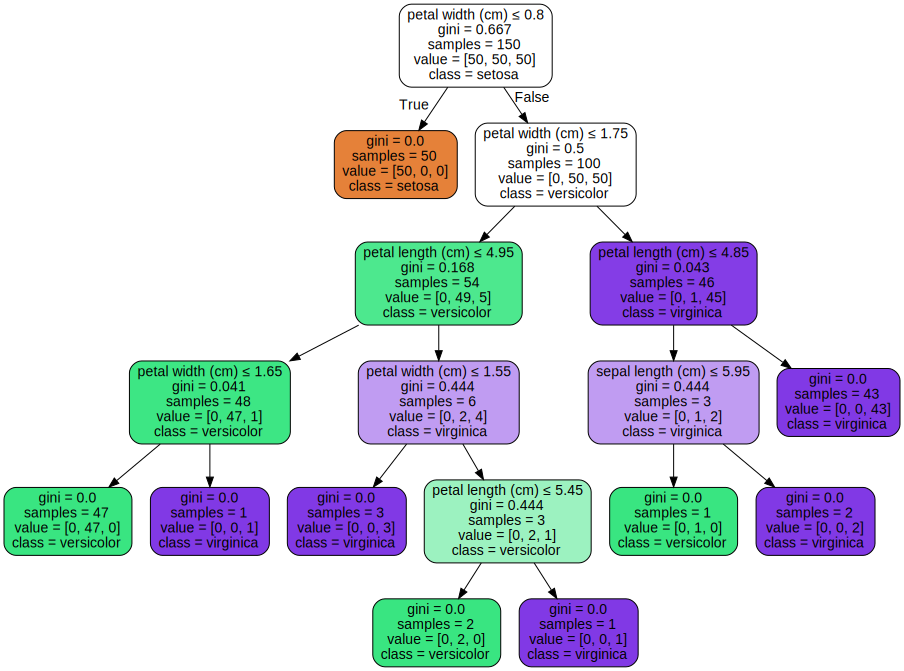

In [ ]:
#visualizing decision tree graph on a bigger clearer image
dot_data = tree.export_graphviz(scikit_iris_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Iris")
dot_data = tree.export_graphviz(scikit_iris_clf, out_file=None,
                                feature_names=scikit_iris.feature_names,
                                class_names=scikit_iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

###Predictions using trained model and scikit model on testing data set

In [ ]:
#predicting testing data set values using ID3 model
iris_ID3_y_pred = iris_clf.predict(scikit_iris_X_test)

#predicting testing data set values using sklearn model
y_pred = scikit_iris_clf.predict(scikit_iris_X_test)

In [ ]:
#comparison between predicted and actual values for sklearn model
print(f'ID3 iris prediction values: \n {iris_ID3_y_pred}\n')
print(f'Scikit iris learn y_prediction values: \n{y_pred}\n')
print(f'y_actual values: \n{scikit_iris_y_test}\n')

ID3 iris prediction values: 
 [1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]

Scikit iris learn y_prediction values: 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]

y_actual values: 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]



In [ ]:
#accuracy of ID3 decision tree model
print(f'ID3 model accuracy:\n{compute_accuracy(scikit_iris_y_test, iris_ID3_y_pred)}\n')

#accuracy of sklearn decision tree model
print(f'scikit model accuracy:\n{accuracy_score(scikit_iris_y_test, y_pred)}\n')

ID3 model accuracy:
0.96

scikit model accuracy:
1.0



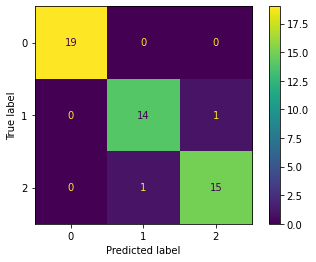

In [ ]:
#ID3 Model
#confusion matrix of true vs prediction values
ConfusionMatrixDisplay.from_predictions(scikit_iris_y_test, iris_ID3_y_pred)

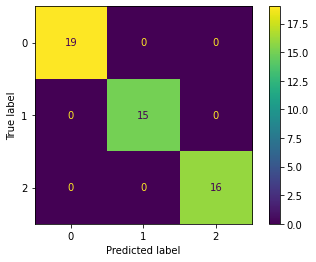

In [ ]:
#Scikit Model
#confusion matrix of true vs prediction values
ConfusionMatrixDisplay.from_predictions(scikit_iris_y_test, y_pred)